# Importing Necessary Libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
!pip uninstall tensorflow

In [ ]:
!pip install tensorflow

In [59]:
df.shape

(891, 12)

# Bivariate Analysis

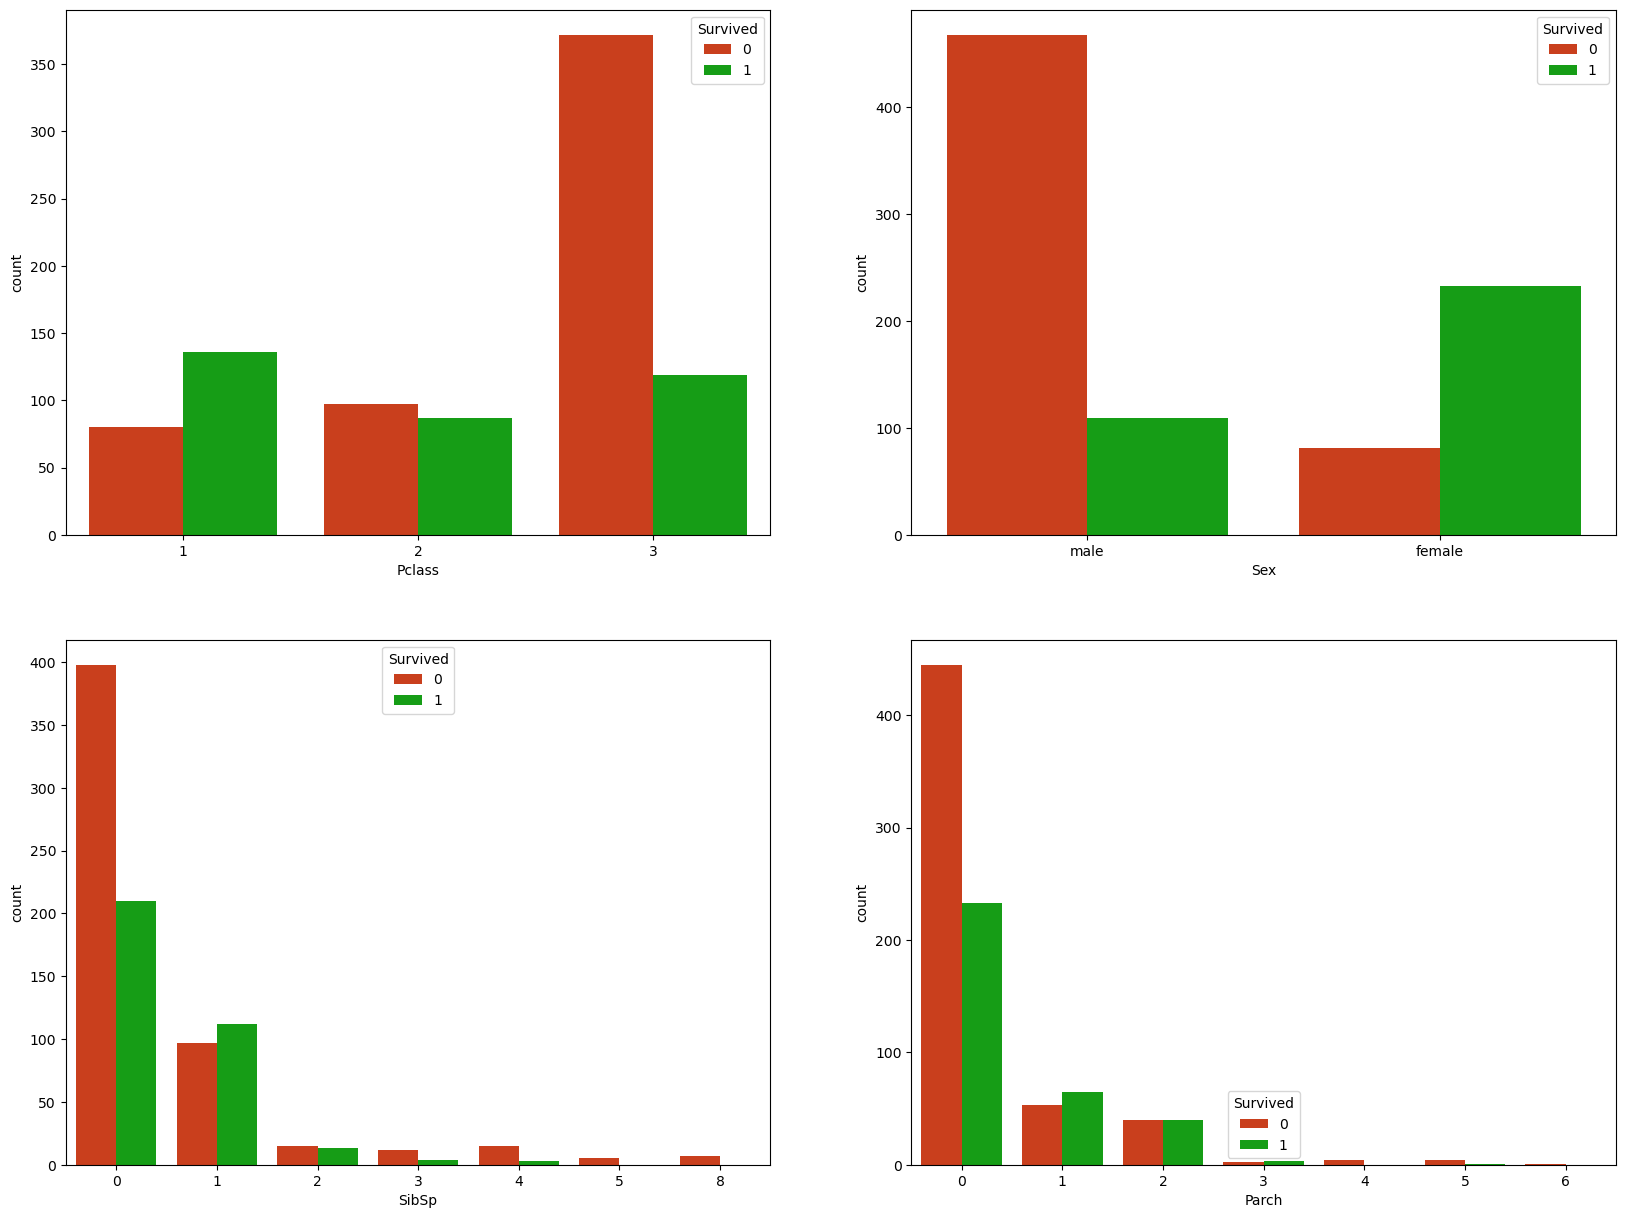

In [60]:
columns = ["Pclass", "Sex", "SibSp", "Parch"]
colors = ["#e62e00", "#00b300"]

fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.ravel()

for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, hue="Survived", palette=colors, ax=axs[i])

plt.show()



# Splitting the Data

In [61]:
X = df.drop(['PassengerId','Name','Ticket','Cabin','Embarked','Survived'],axis = 1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,NaN,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [62]:
y = df['Survived']

# Imputing Null Values

In [63]:
X['Age'] = X['Age'].fillna(X['Age'].median())

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [65]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,28.0,1,2,23.4500
889,1,male,26.0,0,0,30.0000


# Train and Test Split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 6), (179, 6), (712,), (179,))

# Label Encoding the catagorical columns

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
le = LabelEncoder()

In [71]:
X_train['Sex'] = le.fit_transform(X_train['Sex'])

In [72]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare
692,3,1,28.0,0,0,56.4958
481,2,1,28.0,0,0,0.0000
527,1,1,28.0,0,0,221.7792
855,3,0,18.0,0,1,9.3500
801,2,0,31.0,1,1,26.2500
...,...,...,...,...,...,...
359,3,0,28.0,0,0,7.8792
258,1,0,35.0,0,0,512.3292
736,3,0,48.0,1,3,34.3750
462,1,1,47.0,0,0,38.5000


In [73]:
X_test['Sex'] = le.transform(X_test['Sex'])

In [74]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare
565,3,1,24.0,2,0,24.1500
160,3,1,44.0,0,1,16.1000
553,3,1,22.0,0,0,7.2250
860,3,1,41.0,2,0,14.1083
241,3,0,28.0,1,0,15.5000
...,...,...,...,...,...,...
880,2,0,25.0,0,1,26.0000
91,3,1,20.0,0,0,7.8542
883,2,1,28.0,0,0,10.5000
473,2,0,23.0,0,0,13.7917


# Scaling the Data

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [76]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Model Selection

## K-Nearest Neighbors

In [77]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train,y_train)
y_pred_neigh = neigh.predict(X_test)

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_neigh, target_names=['Not_survived','Survived']))

              precision    recall  f1-score   support

Not_survived       0.84      0.88      0.86       110
    Survived       0.80      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



In [79]:
from sklearn.model_selection import GridSearchCV
param = {'n_neighbors': list(range(1,100,2))}
knn = KNeighborsClassifier()
gs = GridSearchCV(knn,param_grid=param,cv=10)
gs.fit(X_train,y_train)
gs.best_params_
final_KNN = KNeighborsClassifier(**gs.best_params_)
final_KNN.fit(X_train,y_train)
y_pred_neigh_gs = final_KNN.predict(X_test)

In [80]:
accuracy = final_KNN.score(X_test,y_test)

# Create an empty DataFrame to store the test accuracies
accuracy_df = pd.DataFrame(columns=['Model', 'Accuracy'])

accuracy_df = accuracy_df.append({'Model': 'KNN', 'Accuracy': accuracy}, ignore_index=True)

In [81]:
accuracy_df

,Model,Accuracy
0,KNN,0.810056


In [82]:
print(classification_report(y_test,y_pred_neigh_gs, target_names=['Not_survived','Survived']))

              precision    recall  f1-score   support

Not_survived       0.81      0.91      0.85       110
    Survived       0.82      0.65      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



<AxesSubplot:>

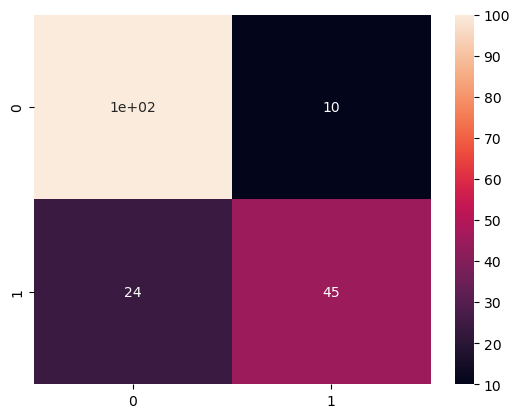

In [83]:
from sklearn.metrics import confusion_matrix

c =confusion_matrix(y_test,y_pred_neigh_gs)

sns.heatmap(c,annot = True)

## Gausian Naive Bayes


In [84]:
from sklearn.naive_bayes import GaussianNB
Nb_model =GaussianNB()
Nb_model.fit(X_train,y_train)
y_pred_nb = Nb_model.predict(X_test)

In [85]:
print(classification_report(y_test,y_pred_nb, target_names=['Not_survived','Survived']))

              precision    recall  f1-score   support

Not_survived       0.82      0.85      0.83       110
    Survived       0.74      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



<AxesSubplot:>

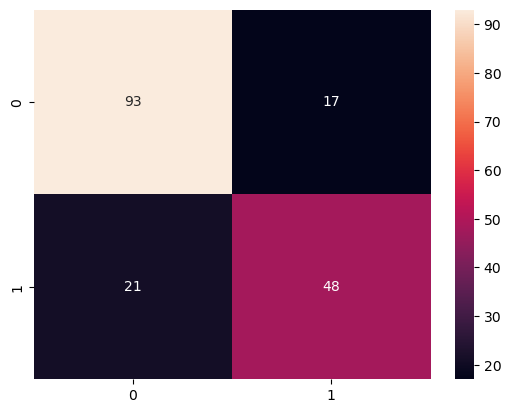

In [86]:
from sklearn.metrics import confusion_matrix

c =confusion_matrix(y_test,y_pred_nb)

sns.heatmap(c,annot = True)

#### Using Gridsearch

In [87]:
param_2 = {'var_smoothing': [.001,.01,.1,1,10,100,1000,.0000001,.00001,.000001]}
Nb_model =GaussianNB()
gs_nb = GridSearchCV(Nb_model,param_grid=param_2,cv=10)
gs_nb.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                           1e-07, 1e-05, 1e-06]})

In [88]:
gs_nb.best_params_

{'var_smoothing': 0.1}

In [89]:
final_Nb = GaussianNB(**gs_nb.best_params_)
final_Nb.fit(X_train,y_train)

GaussianNB(var_smoothing=0.1)

In [90]:
y_pred_nb_gs = final_Nb.predict(X_test)

In [91]:
print(classification_report(y_test,y_pred_nb_gs, target_names=['Not_survived','Survived']))

              precision    recall  f1-score   support

Not_survived       0.82      0.85      0.84       110
    Survived       0.75      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [92]:
accuracy = final_Nb.score(X_test,y_test)

accuracy_df = accuracy_df.append({'Model': 'GaussianNB', 'Accuracy': accuracy}, ignore_index=True)

In [93]:
accuracy_df

,Model,Accuracy
0,KNN,0.810056
1,GaussianNB,0.793296


## Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

lr  = LogisticRegression()

lr.fit(X_train,y_train)

y_pred_le = lr.predict(X_test)

In [95]:
print(classification_report(y_test,y_pred_le, target_names=['Not_survived','Survived']))

              precision    recall  f1-score   support

Not_survived       0.83      0.86      0.84       110
    Survived       0.77      0.71      0.74        69

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



#### Using Gridsearch

In [96]:
from sklearn.model_selection import GridSearchCV
lr_model = LogisticRegression()

# hyperparameter grid
param_grid = {'penalty': ['l1', 'l2'], 
              'C': [0.01, 0.1, 1, 10, 100], 
              'solver': ['liblinear', 'saga']}
grid_search = GridSearchCV(lr_model, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

# Using the best hyperparameters to train a logistic regression model
lr_model_best = LogisticRegression(**grid_search.best_params_)
lr_model_best.fit(X_train, y_train)

# Evaluate the logistic regression model on the test data
test_accuracy = lr_model_best.score(X_test, y_test)
print("Test accuracy: ", test_accuracy)


Best hyperparameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Test accuracy:  0.8044692737430168


In [97]:
y_pred_le_gs = lr_model_best.predict(X_test)

In [98]:
print(classification_report(y_test,y_pred_le_gs, target_names=['Not_survived','Survived']))

              precision    recall  f1-score   support

Not_survived       0.82      0.88      0.85       110
    Survived       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [99]:
accuracy = lr_model_best.score(X_test,y_test)

accuracy_df = accuracy_df.append({'Model': 'Logistic Regression', 'Accuracy': accuracy}, ignore_index=True)
accuracy_df

,Model,Accuracy
0,KNN,0.810056
1,GaussianNB,0.793296
2,Logistic Regression,0.804469


<AxesSubplot:>

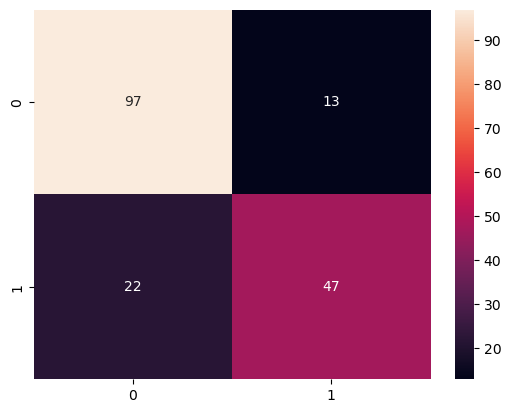

In [100]:
from sklearn.metrics import confusion_matrix

c =confusion_matrix(y_test,y_pred_le_gs)

sns.heatmap(c,annot = True)

## Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)
test_accuracy = dt_model.score(X_test, y_test)
print("Test accuracy (no hyperparameter tuning): ", test_accuracy)


Test accuracy (no hyperparameter tuning):  0.8100558659217877


#### Using Gridsearch

In [102]:
dt_model = DecisionTreeClassifier()

# hyperparameter grid
param_grid = {'max_depth': [1, 2, 3, 4, 5],
              'min_samples_split': [2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 3, 4]}

grid_search = GridSearchCV(dt_model, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

# Using best hyperparameters
dt_model_best = DecisionTreeClassifier(**grid_search.best_params_)
dt_model_best.fit(X_train, y_train)

test_accuracy = dt_model_best.score(X_test, y_test)
print("Test accuracy (with hyperparameter tuning): ", test_accuracy)


Best hyperparameters:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5}
Test accuracy (with hyperparameter tuning):  0.7821229050279329


In [103]:
y_pred_dt = dt_model_best.predict(X_test)

In [104]:
print(classification_report(y_test,y_pred_dt, target_names=['Not_survived','Survived']))

              precision    recall  f1-score   support

Not_survived       0.76      0.95      0.84       110
    Survived       0.88      0.51      0.64        69

    accuracy                           0.78       179
   macro avg       0.82      0.73      0.74       179
weighted avg       0.80      0.78      0.77       179



In [105]:
accuracy = dt_model_best.score(X_test,y_test)

accuracy_df = accuracy_df.append({'Model': 'DecisionTree Classifier', 'Accuracy': accuracy}, ignore_index=True)
accuracy_df

,Model,Accuracy
0,KNN,0.810056
1,GaussianNB,0.793296
2,Logistic Regression,0.804469
3,DecisionTree Classifier,0.782123


<AxesSubplot:>

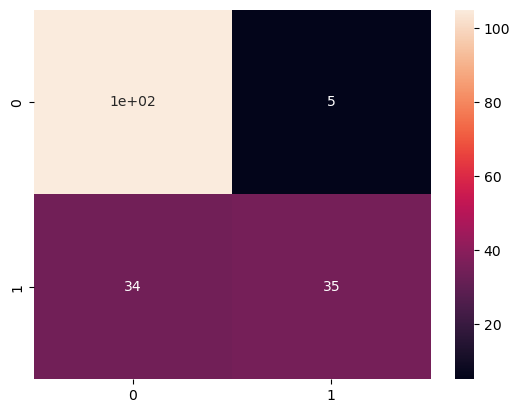

In [106]:
from sklearn.metrics import confusion_matrix

c =confusion_matrix(y_test,y_pred_dt)

sns.heatmap(c,annot = True)

# Random Forrest

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)
print("Test accuracy (no hyperparameter tuning): ", test_accuracy)

rf_model = RandomForestClassifier()

# hyperparameter grid
param_dist = {'n_estimators': [50, 100, 200, 400],
              'max_depth': [5, 10, 15, 20, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False],
              'max_features': ['sqrt', 'log2', None]}

random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best hyperparameters: ", random_search.best_params_)

# Using best hyperparameters
rf_model_best = RandomForestClassifier(**random_search.best_params_)
rf_model_best.fit(X_train, y_train)

test_accuracy = rf_model_best.score(X_test, y_test)
print("Test accuracy (with hyperparameter tuning): ", test_accuracy)


Test accuracy (no hyperparameter tuning):  0.8156424581005587
Best hyperparameters:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Test accuracy (with hyperparameter tuning):  0.8156424581005587


In [108]:
accuracy = rf_model_best.score(X_test,y_test)

accuracy_df = accuracy_df.append({'Model': 'RandomForest Classifier', 'Accuracy': accuracy}, ignore_index=True)
accuracy_df

,Model,Accuracy
0,KNN,0.810056
1,GaussianNB,0.793296
2,Logistic Regression,0.804469
3,DecisionTree Classifier,0.782123
4,RandomForest Classifier,0.815642


# XGboost Classifier

In [109]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
test_accuracy = xgb_model.score(X_test, y_test)
print("Test accuracy (no hyperparameter tuning): ", test_accuracy)

xgb_model = XGBClassifier()

# hyperparameter grid
param_dist = {'n_estimators': [50, 100, 200, 400],
              'max_depth': [5, 10, 15, 20],
              'min_child_weight': [1, 2, 3, 4],
              'learning_rate': [0.01, 0.05, 0.1, 0.2],
              'subsample': [0.5, 0.8, 1.0],
              'colsample_bytree': [0.5, 0.8, 1.0],
              'gamma': [0, 0.1, 0.2, 0.3, 0.4]}

random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best hyperparameters: ", random_search.best_params_)

# Using best hyperparameters
xgb_model_best = XGBClassifier(**random_search.best_params_)
xgb_model_best.fit(X_train, y_train)

test_accuracy = xgb_model_best.score(X_test, y_test)
print("Test accuracy (with hyperparameter tuning): ", test_accuracy)


Test accuracy (no hyperparameter tuning):  0.8156424581005587
Best hyperparameters:  {'subsample': 0.8, 'n_estimators': 400, 'min_child_weight': 4, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.8}
Test accuracy (with hyperparameter tuning):  0.8044692737430168


In [110]:
accuracy = xgb_model_best.score(X_test,y_test)

accuracy_df = accuracy_df.append({'Model': 'XGBClassifier', 'Accuracy': accuracy}, ignore_index=True)
accuracy_df.sort_values(by= "Accuracy",ascending=False)

,Model,Accuracy
4,RandomForest Classifier,0.815642
0,KNN,0.810056
2,Logistic Regression,0.804469
5,XGBClassifier,0.804469
1,GaussianNB,0.793296
3,DecisionTree Classifier,0.782123


# Conclusion

Here we see that the RandomForest Classifier model is giving us the best accuracy score